# Numerisk integrasjon

## Introduksjon

<br>

Integrasjon er en måte å sammenlegge endring og utgir arealet under en graf. Dette gjør at vi, for eksempel, kan finne tilbakelagt strektning mellom to punkter på en fartsgraf. Definisjonen av et bestemt integral mellom punktene a og b mellom f(x) og x-aksen med hensyn på x skrives som følger:

<br>

$$\int_{a}^{b} f(x) dx$$

<br>

Ved numerisk integrasjon, estimerer vi arealet ved hjelp av ulike metoder, som ofte blir nødvendig når vi har diskrete data eller en funksjon som ikke lett integreres analytisk. Og for å gjøre det, må vi først importere en rekke biblioteker som kan plotte grafer, sammenligne ytelse, osv:

<br><br>

In [528]:
from pylab import *
from scipy import integrate
import matplotlib.patches as pt
import time

<br>
Deretter, kan det lages en eksempelfunksjon, f(x), som vi kan foreløpig bruke til å plotte et integral mellom to vilkårlige verdier.
<br><br>

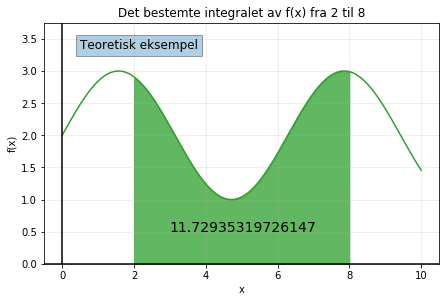

In [608]:
# Testkonstanter
A = 2
B = 8

# Antall inndelinger til metodeeksemplene
N = 6

# Definerer testfunksjon
def f(x):
    return sin(x) + 2

# Finner funksjonsverdier
x = linspace(0, 10, 1000)
y = f(x)

def plotting(description, integral=integrate.quad(f, A, B)[0], a=A, b=B):
    """ Tar tittel og integralverdi for å plotte f(x) med teoretisk standardverdi. """
    
    title(f'Det bestemte integralet av f(x) fra {a} til {b}')
    plot(x, y, color="C2")
    xlabel("x")
    ylabel("f(x)")
    grid(alpha=.25)
    axhline(color="black")
    axvline(color="black")
    tight_layout(pad=0)
    ylim(0,3.75)
    text(3, .5, integral, fontsize=14)
    text(0.5, 3.5, description, fontsize=12,
        verticalalignment='top', bbox=dict(facecolor='C0', alpha=0.35))
    show()

# Fyller arealet i eksempelplottet
fill_between(x, f(x), where = [(x > A) and (x < B) for x in x], color="C2", alpha=.75)

# Plotter grafen
plotting("Teoretisk eksempel")


Ovenfor ser vi hvordan et integral oppsamler arealet under f(x), noe vi nå skal gjøre numerisk!
<br><br>

## Metoder

<br>Før vi går inn på en spesifikk metode, definerer jeg en integralklasse med andre typer metoder. Dette kommer alle metodene til å få bruk for, siden de alle går ut på å legge sammen figurers arealer.
<br><br>

In [530]:
class Integral():
    """ Sammenlegger høyde og returnerer arael gitt en dx. """

    
    def __init__(self):
        """ Setter høyden lik null. """
        
        self.height = 0
    
    
    def add(self, shape):
        """ Legger til høyden gitt et objekt som parameter. """
        
        self.height += shape.height
    
    
    def area(self, dx):
        """ Returnerer et areal gitt en breddekonstant dx. """
        
        return self.height * dx

### Rektangelmetoden

<br>

Rektangelmetoden går ut på å dele funksjonsuttrykket opp i n antall intervaller og sammenlegge deres arealer. Bredden på hvert rektangel blir den totale bredden delt på antall områder, eller som følger:

<br>

$$\Delta x = \frac{b - a}{n}$$

<br>

Da finner vi funksjonsverdien i det første punktet, a, og antar at verdien holder seg lik i et lite område $\Delta x$. Funksjonsverdien er altså høyden i rektangelet som vi kan gange sammen med bredden for å få oss et areal. Fortsetter vi slik for rektangelet som starter ved $x = a + \Delta x$ i alle n inndelinger, kan vi få et tilnærmet integral som følger:

<br>

$$\int_{a}^{b} f(x) dx \approx \sum_{k=0}^{n-1} f(x_k) \Delta x = \Delta x \sum_{k=0}^{n-1} f(x_k)$$

<br>

Her kan det bemerkes at vi slipper å gange hver høyde med $\Delta x$ og kan istedenfor finne summen av funksjonsverdiene og deretter gange dette med denne konstanten $\Delta x$.

<br>

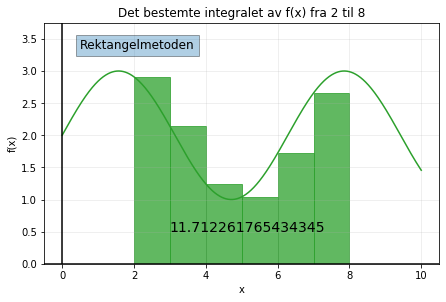

In [531]:
class Rectangle():
    """ Rektangelklasse med høyde og som tegner rektangler. """
    
    def __init__(self, f, x):
        """ Definerer egen høyde. """

        self.height = f(x)
    
    
    def draw(self, x, dx):
        """ Bruker matplotlib.patches til å tegne rektangler. """
        
        gca().add_patch(pt.Rectangle((x, 0), dx, self.height, color="C2", alpha=.75))

        
def rektangelmetoden(f, a=A, b=B, n=N, draw=True):
    """ Definerer rektangelmetoden gitt funksjonsuttrykk, to punkter og antall inndelinger. """
    
    # Definerer dx ut ifra definisjonen
    dx = (b - a) / n
    
    # Definerer et integral
    Rektangelmetoden = Integral()
    
    # Går igjennom antall inndelinger og legger areal til i integralet
    # Sjekker draw 1 gang for forbedret ytelse
    if draw:
        for k in range(n):
            rektangel = Rectangle(f, a + k * dx)
            rektangel.draw(a + k * dx, dx)
            Rektangelmetoden.add(rektangel)
    else:
        for k in range(n):
            Rektangelmetoden.add(Rectangle(f, a + k * dx))
    
    # Returnerer arealet gitt bredden dx
    return Rektangelmetoden.area(dx)

plotting("Rektangelmetoden", rektangelmetoden(f))

### Trapesmetoden

<br>

Istedenfor et nulltegradspolynom, kan vi istedenfor benytte oss av et førstegradspolynom for å finne arealet under grafen. For å gjøre det, deler vi opp arealet i de samme n delene, men finner arealet til trapesene imellom dem istedenfor. Dette krever at vi finner funksjonsverdien for to punkter for hvert trapes: en på starten og en på slutten. Heldigvis vil mange av disse punktene samsvare, noe som gjør at vi kan forenkle det generelle uttrykket for arealet til trapeser, der k er antall $\Delta x$ til en vilkårlig trapes:

<br>

$$A_k = \frac{(a + k \Delta x) + (a + (k + 1) \Delta x)}{2} \Delta x$$

<br>

Her finner vi gjennomsnittsfunksjonsverdien og ganger den med bredden $\Delta x$. Dette må vi gjøre for alle k-verdier fra 0 til N (ekslusivt), og det kan forenkles hvis vi skriver opp og faktoriserer uttrykket først uten summetegn (bemerk at $f(a + n\Delta x) = f(b)$):

<br>

$$\int_{a}^{b} f(x) dx \approx \Delta x \frac{f(a) + f(a + \Delta x)}{2} + \Delta x \frac{f(a + \Delta x) + f(a + 2 \Delta x)}{2} + . . . + \Delta x \frac{f(a + (n - 1)\Delta x) + f(b)}{2}$$

$$\approx \Delta x (\frac{f(a) + f(a + \Delta x)}{2} +  \frac{f(a + \Delta x) + f(a + 2 \Delta x)}{2} + . . . + \frac{f(a + (n - 1)\Delta x) + f(b)}{2})$$

$$\approx \Delta x (\frac{f(a) + f(a + \Delta x) + f(a + \Delta x) + f(a + 2 \Delta x) + . . . + f(a + (n - 1)\Delta x) + f(b)}{2})$$

$$\approx \Delta x (\frac{f(a) + 2f(a + \Delta x) + 2f(a + 2 \Delta x) + . . . + 2f(a + (n - 1)\Delta x) + f(b)}{2})$$

<br>

Får vi disse på fellesnevner, ser vi nemlig at vi må addere hver funksjonsverdi to ganger før vi deler på to, med unntak av f(a) og f(b). Dette gjør beregningene videre enklere:

<br>

$$\approx \Delta x (\frac{f(a) + f(b)}{2} + \frac{2f(a + \Delta x) + 2f(a + 2 \Delta x) + . . . + 2f(a + (n - 1)\Delta x)}{2})$$

$$\approx \Delta x (\frac{f(a) + f(b)}{2} + f(a + \Delta x) + f(a + 2 \Delta x) + . . . + f(a + (n - 1)\Delta x))$$

$$\approx \Delta x (\frac{f(a) + f(b)}{2} + \sum_{k=1}^{n - 1} f(a + k\Delta x))$$

$$\approx \Delta x (\frac{f(a) + f(b)}{2} + \sum_{k=1}^{n - 1} f(x_k))$$

<br>
<br>

Vi kan dermed forbedre ytelsen ved å summere gjennomsnitsfunksjonsverdien til a og b med funksjonsverdiene til oppdelingene imellom som vi til slutt ganger med bredden, $\Delta x$. Det kan vi gjøre som følger:

<br>

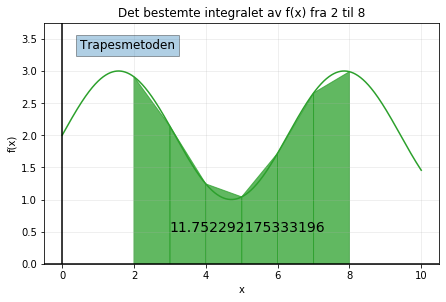

In [532]:
class Trapezoid():
    """ Trapesklasse med høyde og som tegner trapeser. """
    
    def __init__(self, f, x):
        """ Definerer egen høyde. """
        
        self.height = f(x)
    
    
    def draw(self, x, dx, fdx):
        """ Bruker matplotlib.patches til å tegne trapeser. """
        
        gca().add_patch(pt.Polygon(([x, 0], [x + dx, 0], [x + dx, fdx], [x, self.height]),\
                                   color="C2", alpha=.75))

def trapesmetoden(f, a=A, b=B, n=N, draw=True):
    """ Definerer trapesmetoden gitt funksjonsuttrykk, to punkter og antall inndelinger. """
    
    # Definerer dx ut ifra definisjonen
    dx = (b - a) / n
    
    # Definerer et integral
    Trapesmetoden = Integral()
    
    # Definerer nullte trapes som senere hoppes over
    Kantareal = Trapezoid(f, a)
    
    # Går igjennom antall inndelinger bortsett fra den første og legger areal til i integralet
    # Sjekker draw 1 gang for forbedret ytelse
    
    if draw:
        # Tegner trapeset
        Kantareal.draw(a, dx, f(a + dx))
        
        for k in range(1, n):
            trapes = Trapezoid(f, a + k * dx)
            trapes.draw(a + k * dx, dx, f(a + k * dx + dx))
            Trapesmetoden.add(trapes)
    else:
        for k in range(1, n):
            Trapesmetoden.add(Trapezoid(f, a + k * dx))
    
    # Overskrider høydeverdien til den definerte
    Kantareal.height = (f(a) + f(b)) / 2
    
    # Legger til arealet
    Trapesmetoden.add(Kantareal)
    
    # Returnerer arealet gitt bredden dx
    return Trapesmetoden.area(dx)

plotting("Trapesmetoden", trapesmetoden(f))

### Simpsons metode

<br>

Simpsons metode går ut på å øke polynomgraden en gang til. For å approksimere et annengradspolynom, trenger vi tre punkter som vi må få på formen:

<br>

$$P(x) = Ax^2 + Bx + C$$

<br>

For å få det til, deler vi igjen inn integralet i like mange deler, men her må antallet være partall. Det er fordi vi kommer til å estimere integralet for to områder av gangen. Men for å forklare det, trengs en liten illustrasjon:

<br>

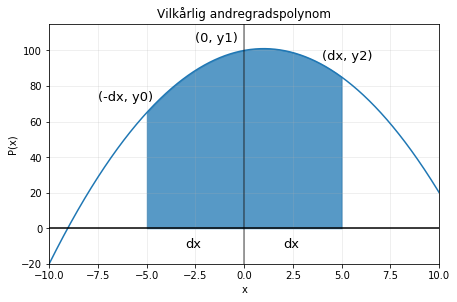

In [533]:
# Her definerer jeg en vilkårlig funksjon og plotter ulike titler osv.:
def p(x):
    return - x**2 + 2*x + 100

q = linspace(-10, 10, 1000)
r = p(q)

plot(q,r, color="C0")
title(f'Vilkårlig andregradspolynom')
xlabel("x")
ylabel("P(x)")
grid(alpha=.25)
axhline(color="black")
axvline(color="black", alpha=.5)
text(-3, -11, "dx", fontsize=13)
text(2, -11, "dx", fontsize=13)
text(-7.5, 72, "(-dx, y0)", fontsize=13)
text(-2.5, 105, "(0, y1)", fontsize=13)
text(4, 95, "(dx, y2)", fontsize=13)
tight_layout(pad=0)
fill_between(q, r, where = [(i < 5) and (i > -5) for i in q], color="C0", alpha=.75)
xlim(-10,10)
ylim(-20,115)
show()

Har vi tre jevnt fordelte punkter, kan vi starte med å forskyve punktene slik at det midterste, $y_1$, lander på y-aksen. Integralet til kurven forblir det samme siden funksjonsverdiene til $P(x)$ er fremdeles $y_0$, $y_1$ og $y_2$.

<br>

Nå kan vi sette inn disse tre x-verdiene inn i P(x) og få uttrykk for y-verdiene:

<br>

$$y_0 = A(-\Delta x)^2 + B(-\Delta x) + C$$
$$y_0 = A\Delta x^2 - B\Delta x + C$$

$$y_1 = A(0)^2 + B(0) + C$$
$$y_1 = C$$

$$y_2 = A(\Delta x)^2 + B(\Delta x) + C$$
$$y_2 = A\Delta x^2 + B\Delta x + C$$

<br>

Legger vi nå sammen noen av disse uttrykkene, kan vi få fjernet B og få et nytt uttrykk vi får bruk for snart:

<br>

$$y_0 + 4y_1 + y_2 = (A\Delta x^2 - B\Delta x + C) + 4(C) + (A\Delta x^2 + B\Delta x + C)$$
$$y_0 + 4y_1 + y_2 = 2A\Delta x^2 + 6C$$

<br>

Dessverre trenger vi nå litt analytisk matematikk for å finne integralet til $P(x)$ direkte:

<br>

$$\int_{-\Delta x}^{\Delta x} P(x) dx = \int_{-\Delta x}^{\Delta x} Ax^2 + Bx + C dx$$
$$= [\frac{1}{3}Ax^3 + \frac{1}{2}Bx^2 + Cx]_{-\Delta x}^{\Delta x}$$
$$= \frac{1}{3}A\Delta x^3 + \frac{1}{2}B\Delta x^2 + C\Delta x - (\frac{1}{3}A(-\Delta x)^3 + \frac{1}{2}B(-\Delta x)^2 - C\Delta x)$$
$$= \frac{1}{3}A\Delta x^3 + \frac{1}{2}B\Delta x^2 + C\Delta x - (-\frac{1}{3}A\Delta x^3 + \frac{1}{2}B\Delta x^2 - C\Delta x)$$
$$= \frac{2}{3}A\Delta x^3 + 2C\Delta x$$
$$= \frac{\Delta x}{3}(2A\Delta x^2 + 6C)$$

<br>

Nå kan vi endelig erstatte $2A\Delta x^2 + 6C$ med $y_0 + 4y_1 + y_2$ og finne et uttrykk vi kan integrere numerisk, nemlig følgende:

$$= \frac{\Delta x}{3}(y_0 + 4y_1 + y_2)$$

Da er det bare å gjøre litt ren forkorting som vi gjorde ved trapesmetoden for å finne et uttrykk for integralet mellom alle n punkter mellom a og b, ikke bare disse tre. Vi starter ved å legge til det neste parabelets y-verdier og går videre derfra:

$$\int_{a}^{b} f(x) dx \approx \frac{\Delta x}{3}(y_0 + 4y_1 + y_2) + \frac{\Delta x}{3}(y_2 + 4y_3 + y_4) + \frac{\Delta x}{3}(y_4 + 4y_5 + y_6) + . . . + \frac{\Delta x}{3}(y_{n - 2} + 4y_{n - 1} + y_n)$$

$$\approx \frac{\Delta x}{3}(y_0 + 4y_1 + y_2 + y_2 + 4y_3 + y_4 + y_4 + 4y_5 + y_6 + . . . + y_{n - 2} + 4y_{n - 1} + y_n)$$
$$\approx \frac{\Delta x}{3}(y_0 + 4y_1 + 2y_2 + 4y_3 + 2y_4 + 4y_5 + 2y_6 + . . . + 2y_{n - 2} + 4y_{n - 1} + y_n)$$

<br>

Her observerer vi hver partalls-y fra og med 2 til og med n - 2 har 2 som koeffisient mens hver oddetals-y har 4 som koeffisient. Igjen, må $y_n$, eller $f(b)$, være partall for at metoden skal virke. Da kan vi forkorte som følger:

<br>

$$\approx \frac{\Delta x}{3}(y_0 + y_n + 2y_2 + 2y_4 + 2y_6 + . . . + 2y_{n - 2} + 4y_1 + 4y_3 + 4y_5 + . . . + 4y_{n - 1})$$

$$\approx \frac{\Delta x}{3}(y_0 + y_n + 2 \sum_{k=1}^{\frac{n}{2} - 1} y_{2k} + 4 \sum_{k=1}^{\frac{n}{2}} y_{2k - 1})$$

$$\approx \frac{\Delta x}{3}(f(a) + f(b) + 2 \sum_{k=1}^{\frac{n}{2} - 1} f(x_{2k}) + 4 \sum_{k=1}^{\frac{n}{2}} f(x_{2k - 1}))$$

<br>

Og dette, dette kan vi endelig bruke!

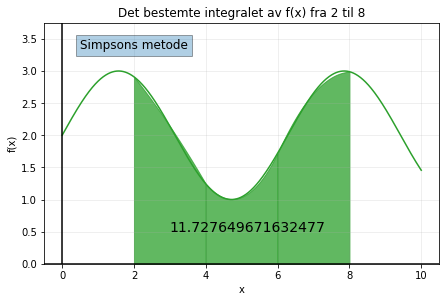

In [534]:
class Polynomial():
    """ Polynomklasse med høyde og som tegner polynomintegraler. """
    
    def __init__(self, f, x):
        """ Definerer egen høyde. """
        
        self.height = f(x)

    def draw(self, f, x, dx):
        """ Finner polynomkonstanter ved å omordne likningene for y0, y1 og y2 ovenfor. """
        
        C = f(x + dx)
        A = (f(x) - 2 * C + f(x + 2 * dx)) / (2 * dx ** 2)
        B = (A * dx ** 2 - f(x) + C) / dx
        
        # Definerer andregradspolynom
        def h(i):
            return A * i ** 2 + B * i + C
        
        # Finner verdiene til parabelen fra -dx til dx
        g = linspace(-dx, dx, 100)
        
        # Forskyver verdiene fra y-aksen til deres riktig sted og fyller inn arealet
        fill_between(g + x + dx, h(g), color="C2", alpha=.75)


def simpsonsmetode(f, a=A, b=B, n=N, draw=True):
    """ Definerer simpsons metode gitt funksjonsuttrykk, to punkter og antall inndelinger. """
    
    # Definerer dx ut ifra definisjonen
    dx = (b - a) / n
    
    # Definerer et integral
    Simpsonsmetode = Integral()
    
    # Definerer nullte polynom som senere hoppes over
    Startareal = Polynomial(f, a)
    
    # Sjekker draw 1 gang for forbedret ytelse
    if draw:
        # Tegner startspolynomet
        Startareal.draw(f, a, dx)
        
        for k in range(1, n):
            scale = Polynomial(f, a + k * dx)
            scale.height *= 2
            if k % 2 == 1:
                scale.height *= 2
            else:
                scale.draw(f, a + k * dx, dx)
            Simpsonsmetode.add(scale)
    else:
        for k in range(1, n):
            scale = Polynomial(f, a + k * dx)
            scale.height *= 2
            if k % 2 == 1:
                scale.height *= 2
            Simpsonsmetode.add(scale)
    
    # Overskrider høydeverdien til den definerte
    Startareal.height = f(a) + f(b)
    
    # Legger til arealet
    Simpsonsmetode.add(Startareal)
    
    return Simpsonsmetode.area(dx / 3)

plotting("Simpsons metode", simpsonsmetode(f))

### Monte Carlo-integrasjon

<br>

Monte Carlo-integrasjon er en probabilistisk måte å finne arealet til en funksjon på. Istedenfor å sammelegge små arealer, fokuserer heller metoden på å finne en gjennomsnittlig funksjonsverdi over intervallet [a, b] som kan ganges med intervallengden (b - a) for å finne et integral. Det kan noteres som følger:

<br>

$$\int_{a}^{b} f(x) dx \approx \int_{a}^{b} f(\bar{x}) dx$$

$$\approx (b - a)\sum_{k=1}^{n} f(x_k) \frac{1}{n} $$

$$\approx \frac{(b - a)}{n}\sum_{k=1}^{n} f(x_k)$$

<br>

Dette gjør vi nokså enkelt ved en random-funksjon som vi får importert til å gi oss en gjennomsnittlig funksjonsverdi.

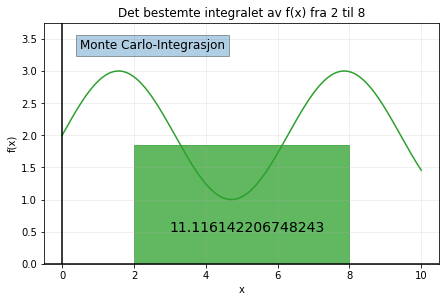

In [535]:
class Value():
    """ Verdiklasse med høyde """
    
    def __init__(self, f, x):
        """ Definerer egen høyde. """
        
        self.height = f(x)


def montecarlo(f, a=A, b=B, n=N, draw=True):
    """ Definerer Monte Carlo-metoden gitt funksjonsuttrykk, to punkter og antall inndelinger. """
    
    # Definerer dx mellom a og b
    dx = (b - a)
    
    # Definerer et integral
    Montecarlo = Integral()
    
    for i in range(n):
        Montecarlo.add(Value(f,(random() * dx + a)))
    
    if draw:
        gca().add_patch(pt.Rectangle((a, 0), dx, Montecarlo.area(dx / n) / dx, color="C2", alpha=.75))
    
    return Montecarlo.area(dx / n)

plotting("Monte Carlo-Integrasjon", montecarlo(f))

## Sammenlikning

<br>

Nå kan vi sammenlikne de fire ulike integrasjonsmetodene og veie opp forskjeller. Da kommer jeg til å brukke en rekke forksjellige funksjoner, i tilleg til ulik antall inndelinger.

<br>

Først, kan vi definere en generell sjekkfunksjon og fem funksjoner vi kan sjekke:

<br>

In [626]:
# Funksjoner
def e(x):
    return 5


def g(x):
    return 5 * x + 3


def h(x):
    return 3 * x ** 2 + x - 6


def i(x):
    return 8 * x ** 5 - 7 * x ** 4 + 3 * x ** 2 + 23


def j(x):
    return cos(x) ** 2


def sjekk(f, metode, title, N, A=A, B=B):
    """ Returnerer resultater fra flere gjennomganger"""
    
    data = f'{title}\n\n{"{:<15}".format("N")}{"{:<15}".format("Integral")}{"{:<15}".format("Time")}\n'
    
    # Går igjennom samme funksjon for ulike N-verdier
    for i in range(N):
        start = time.time()
        result = "{:<15}".format(10**i) + "{:<15}".format(round(metode(f, A, B, 10**i, False), 4))
        data += result + "{:<15}".format(round(time.time() - start, 4)) + "\n"
    
    # Returnerer data
    return data

<br>

Nå kan vi sammenligne resultetene til integralet til nulltegradspolynomet e(x) mellom A = 2 og B = 8:

<br>

In [621]:
print(sjekk(e, rektangelmetoden, "Rektangelmetoden", 7))
print(sjekk(e, trapesmetoden, "Trapesmetoden", 7))
print(sjekk(e, simpsonsmetode, "Simpsons metode", 7))
print(sjekk(e, montecarlo, "Monte Carlo", 7))
print(f'Integral: {integrate.quad(e, A, B)[0]}')

Rektangelmetoden

N              Integral       Time           
1              30.0           0.0            
10             30.0           0.0            
100            30.0           0.0001         
1000           30.0           0.0008         
10000          30.0           0.0094         
100000         30.0           0.1079         
1000000        30.0           0.8236         

Trapesmetoden

N              Integral       Time           
1              30.0           0.0            
10             30.0           0.0            
100            30.0           0.0001         
1000           30.0           0.0008         
10000          30.0           0.0084         
100000         30.0           0.081          
1000000        30.0           0.8538         

Simpsons metode

N              Integral       Time           
1              20.0           0.0            
10             30.0           0.0            
100            30.0           0.0001         
1000           30.0         

<br>

Så kan vi sammenligne resultetene til integralet til førstegradspolynomet g(x) mellom A = 2 og B = 8:

<br>

In [622]:
print(sjekk(g, rektangelmetoden, "Rektangelmetoden", 7))
print(sjekk(g, trapesmetoden, "Trapesmetoden", 7))
print(sjekk(g, simpsonsmetode, "Simpsons metode", 7))
print(sjekk(g, montecarlo, "Monte Carlo", 7))
print(f'Integral: {integrate.quad(g, A, B)[0]}')

Rektangelmetoden

N              Integral       Time           
1              78.0           0.0            
10             159.0          0.0            
100            167.1          0.0001         
1000           167.91         0.0009         
10000          167.991        0.0165         
100000         167.9991       0.1086         
1000000        167.9999       0.9391         

Trapesmetoden

N              Integral       Time           
1              168.0          0.0            
10             168.0          0.0            
100            168.0          0.0001         
1000           168.0          0.0018         
10000          168.0          0.017          
100000         168.0          0.1127         
1000000        168.0          1.1151         

Simpsons metode

N              Integral       Time           
1              112.0          0.0            
10             168.0          0.0            
100            168.0          0.0001         
1000           168.0        

<br>

Så kan vi sammenligne resultetene til integralet til andregradspolynomet h(x) mellom A = 2 og B = 8:

<br>

In [623]:
print(sjekk(h, rektangelmetoden, "Rektangelmetoden", 7))
print(sjekk(h, trapesmetoden, "Trapesmetoden", 7))
print(sjekk(h, simpsonsmetode, "Simpsons metode", 7))
print(sjekk(h, montecarlo, "Monte Carlo", 7))
print(f'Integral: {integrate.quad(h, A, B)[0]}')

Rektangelmetoden

N              Integral       Time           
1              48.0           0.0            
10             443.28         0.0            
100            492.4308       0.0002         
1000           497.4421       0.002          
10000          497.9442       0.0191         
100000         497.9944       0.1256         
1000000        497.9994       1.1594         

Trapesmetoden

N              Integral       Time           
1              606.0          0.0            
10             499.08         0.0            
100            498.0108       0.0001         
1000           498.0001       0.0014         
10000          498.0          0.0134         
100000         498.0          0.1171         
1000000        498.0          1.4172         

Simpsons metode

N              Integral       Time           
1              404.0          0.0            
10             498.0          0.0            
100            498.0          0.0002         
1000           498.0        

<br>

Så kan vi sammenligne resultetene til integralet til polynomet i(x) mellom A = 2 og B = 8:

<br>

In [627]:
print(sjekk(i, rektangelmetoden, "Rektangelmetoden", 7))
print(sjekk(i, trapesmetoden, "Trapesmetoden", 7))
print(sjekk(i, simpsonsmetode, "Simpsons metode", 7))
print(sjekk(i, montecarlo, "Monte Carlo", 7))
print(f'Integral: {integrate.quad(i, A, B)[0]}')

Rektangelmetoden

N              Integral       Time           
1              1074.0         0.0            
10             238667.9174    0.0            
100            297291.0967    0.0002         
1000           303551.5234    0.0025         
10000          304181.5521    0.0155         
100000         304244.5948    0.1623         
1000000        304250.8995    1.4258         

Trapesmetoden

N              Integral       Time           
1              701598.0       0.0            
10             308720.3174    0.0            
100            304296.3367    0.0002         
1000           304252.0474    0.0018         
10000          304251.6045    0.0175         
100000         304251.6       0.1907         
1000000        304251.6       1.4657         

Simpsons metode

N              Integral       Time           
1              467732.0       0.0            
10             304271.6102    0.0            
100            304251.602     0.0002         
1000           304251.6     

<br>

Til slutt kan vi sammenligne resultetene til integralet til cosinusfunksjonen j(x) mellom A = 2 og B = 8:

<br>

In [629]:
print(sjekk(j, rektangelmetoden, "Rektangelmetoden", 7))
print(sjekk(j, trapesmetoden, "Trapesmetoden", 7))
print(sjekk(j, simpsonsmetode, "Simpsons metode", 7))
print(sjekk(j, montecarlo, "Monte Carlo", 7))
print(f'Integral: {integrate.quad(j, A, B)[0]}')

Rektangelmetoden

N              Integral       Time           
1              1.0391         0.0001         
10             3.1484         0.0001         
100            3.1216         0.0004         
1000           3.1177         0.0049         
10000          3.1173         0.0433         
100000         3.1172         0.4179         
1000000        3.1172         4.2131         

Trapesmetoden

N              Integral       Time           
1              0.583          0.0001         
10             3.1028         0.0001         
100            3.1171         0.0004         
1000           3.1172         0.0036         
10000          3.1172         0.0382         
100000         3.1172         0.3929         
1000000        3.1172         4.6311         

Simpsons metode

N              Integral       Time           
1              0.3887         0.0001         
10             3.1188         0.0001         
100            3.1172         0.0005         
1000           3.1172       

## Analyse


### Rektangelmetoden

Rektangelmetoden ser vi ga raske resultater relativt fort, spesielt ved nulltegradspolynomer som rektangler selv er. Vi ser også at i resten av tilfellene, økte nøyaktigheten med antall rektangler vi innpresset, så hadde vi bare kunnet hatt evig mange, ville vi fått et helt presist svar. Her ser vi også at det ble begrenset til forskjell etter N = 1000, tildels fordi jeg valgte å avrunde femte desimal i sammenligningen. Vi ser også at denne metoden ikke var like rask ved cosinusfunksjonen, noe som kan skyldes at rektangler passer svært dårlig i sving(ning)er!

### Trapesmetoden

Som rektangelmetoden, kom trapesmetoden fort og raskt frem til et integral i alle tilfeller. Vi ser også at trapesmeetoden ga en nøyaktig svar på førstegradsintegralet fra og med første N, noe som forventes siden areal under en rett linje kan presist tilnærmes et trapes. Disse metodene er enkle og raske, noe som gjorde N-verdier over 100 ikke så veldig brukbare.

### Simpsons metode

Simpsons metode er også en Newton-Cotes metode og gir dermed svært sammenlignbare resultatet som de to sistnevnte. Det som er bemerkelsesverdig, er at metoden trengte flere enn 1 N alle polynomene, der de to sistnevnte kun trengte 1 i enkelte tilfeller. Dette gir mening fordi denne metoden trenger 3 punkter og en N som er partall for å gjøre en tilnærming, som vil gjøre N = 1 sammenligningene her nytteløse. Uansett, er det viktig å påpeke og huske når man benytter seg av denne metoden som er særdeles mer avansert enn de sistnevnte - i hvertfall å utlede!

### Monte Carlo

I og med at Monte Carlo baseres på ren gjetting og tilnærming et gjennomsnitt, gir det mening hvorfor resultatene blir så usikre ved små N-verdier. Dette gjorde at metoden ofte krevde 10000 iterasjoner, noe vi heldigvis har mulighet til med nåtidens teknologi. Fordelen her, er at slike Monte Carlo-metoder kan benyttes til mye mer enn bare integrasjon, noe som gjør den svært versatil. Til dette, ville jeg nok helst holdt meg til de sistnevnte metodene, med mindre vi hadde rotete diskrete data å integrere der jevnt oppdelte områder ikke finnes. I denne testen, derimot, brukte den tid og var noe mer usikker enn resten av metodene.

## Konklusjon

Som vi ser gjennom ulike forklaringer og sammenligninger, er det mange måter å numerisk integrere funksjoner på. Vi så at de tre første Newton-Cotes metodene gikk ut på å tilnærme polynomer til grafen, noe som ofte virket fint når funksjonen vår var et slikt polynom. I tilegg, så vi at vi kunne tilnærme et integral ved å finne et gjennomsnittlig uttrykk for funksjonen ved bruk av en Monte Carlo-metode. Uansett tilfelle, ble resultatene mer nøyaktige ved større N-verdier, noe som sier oss at vi hadde nådd en analytisk løsning hadde vi bare hatt evig tid og ressurser. Med arbeidet som gikk bak simpsons metode, tenker jeg nå til slutt at den beste numeriske integrasjonsmetoden ofte er den letteste: nemling rektangelmetoden.